In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# blur

In [2]:
from backend import blurring

In [3]:
blur_gray = blurring.Blur("./files/test_images/lena.png")
blur_color = blurring.Blur("./files/test_images/lena.png", color=True)

blur_gray.fit(100)
blur_color.fit(100)

./files/test_images/lena.png

## Grayscale

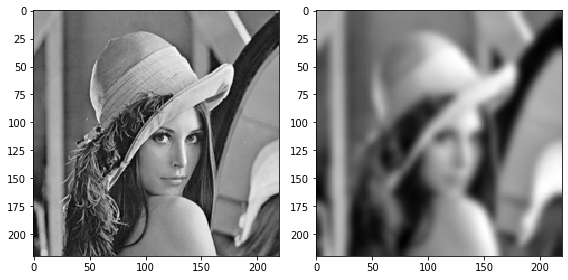

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(blur_gray.data_copy, plt.cm.gray)
axes[1].imshow(blur_gray.data, plt.cm.gray)
fig.tight_layout()

## Color 

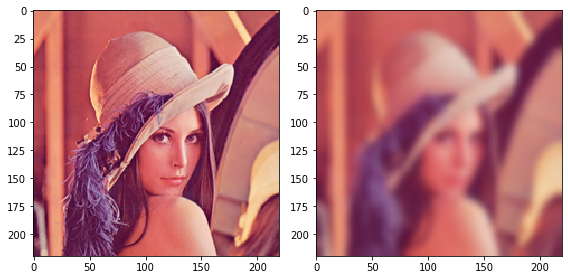

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(blur_color.data_copy, plt.cm.gray)
axes[1].imshow(blur_color.data)
fig.tight_layout()

# inpaiting

In [6]:
from backend import inpaiting

## Grayscale

In [7]:
inpaint = inpaiting.Inpaint("./files/test_images/lena.png")
_ = inpaint.destroy_information()
_ = inpaint.fit(epochs=100)

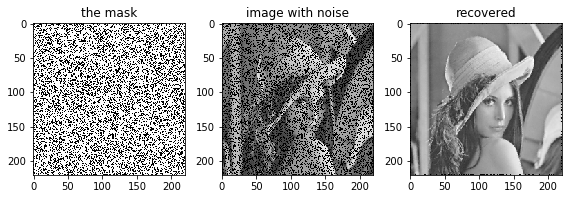

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
axes[0].imshow(inpaint.mask, plt.cm.gray)
axes[0].set_title("the mask")
axes[1].imshow(inpaint.original_data_copy, plt.cm.gray)
axes[1].set_title("image with noise")
axes[2].imshow(inpaint.data, plt.cm.gray)
axes[2].set_title("recovered")
fig.tight_layout()

## Color

In [9]:
inpaint = inpaiting.Inpaint("./files/test_images/lena.png", color=True)
_ = inpaint.destroy_information()
_ = inpaint.fit(epochs=100)

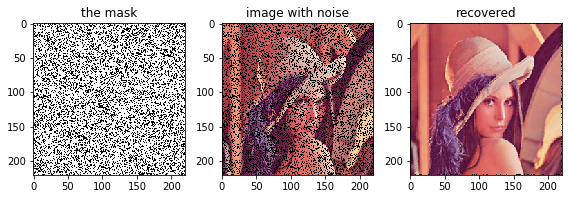

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
axes[0].imshow(inpaint.mask, plt.cm.gray)
axes[0].set_title("the mask")
axes[1].imshow(inpaint.original_data_copy, plt.cm.gray)
axes[1].set_title("image with noise")
axes[2].imshow(inpaint.data, plt.cm.gray)
axes[2].set_title("recovered")
fig.tight_layout()

# Contrasting

In [11]:
from backend import contrasting

## Grayscale

In [12]:
contrast = contrasting.Contrast('./files/test_images/contrast.jpg')
contrast.fit(100)

./files/test_images/contrast.jpg

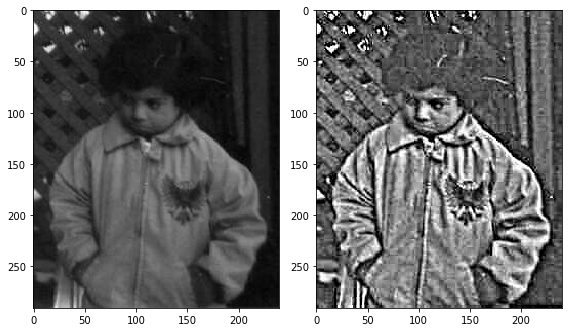

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(contrast.data_copy, plt.cm.gray)
axes[1].imshow(contrast.data, plt.cm.gray)
fig.tight_layout()

## changing the k

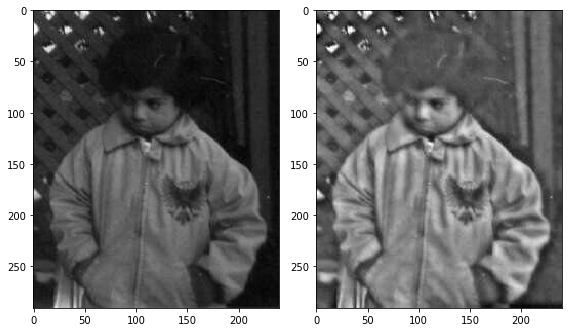

In [14]:
contrast.k = 2
contrast.fit(100)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(contrast.data_copy, plt.cm.gray)
axes[1].imshow(contrast.data, plt.cm.gray)
fig.tight_layout()

### @property error checking

In [15]:
contrast.k = "this is a number"

AssertionError: k should be a number

## Color

In [21]:
contrast = contrasting.Contrast('./files/test_images/contrast_color.jpg', True)
contrast.fit(100)

./files/test_images/contrast_color.jpg

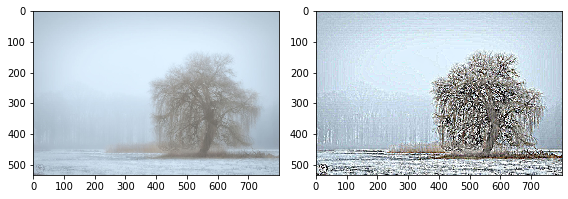

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(contrast.data_copy, plt.cm.gray)
axes[1].imshow(contrast.data, plt.cm.gray)
fig.tight_layout()

# Demosaicing

In [23]:
from backend import demosaicing

In [24]:
demosaic = demosaicing.Demosaic("./files/test_images/lena.png", color=True)

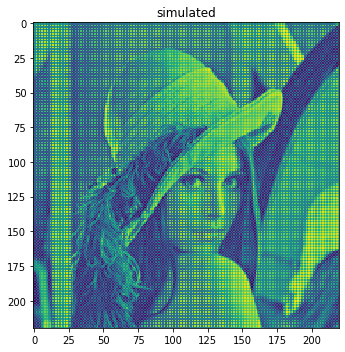

In [25]:
demosaic.simulate()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(demosaic.data)
axes.set_title("simulated")
fig.tight_layout()

In [26]:
demosaic.fit(100)

./files/test_images/lena.png

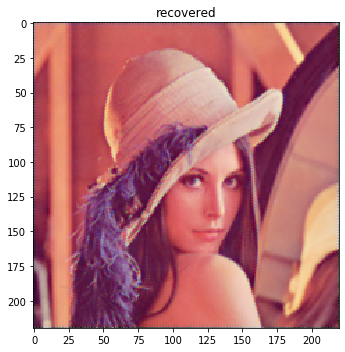

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(demosaic.data)
axes.set_title("recovered")
fig.tight_layout()

# Matting (sømløs-kloning)

In [28]:
from backend import matting

In [29]:
matt = matting.Matting()

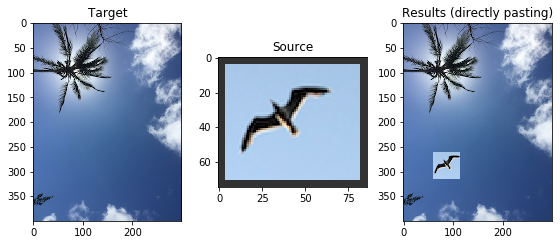

In [30]:
matt.reset()
matt.bad_fit()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
axes[0].imshow(matt.data_copy, plt.cm.gray)
axes[0].set_title("Target")
axes[1].imshow(matt.source.data, plt.cm.gray)
axes[1].set_title("Source")
axes[2].imshow(matt.data)
axes[2].set_title("Results (directly pasting)")
fig.tight_layout()

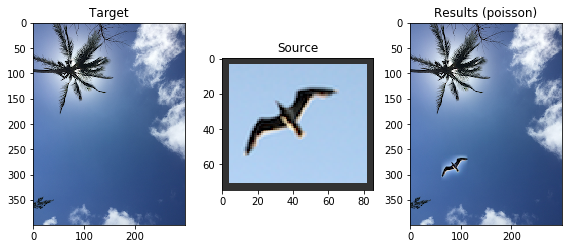

In [31]:
matt.reset()
matt.fit(500)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
axes[0].imshow(matt.data_copy, plt.cm.gray)
axes[0].set_title("Target")
axes[1].imshow(matt.source.data, plt.cm.gray)
axes[1].set_title("Source")
axes[2].imshow(matt.data)
axes[2].set_title("Results (poisson)")
fig.tight_layout()

# Grayscale converter

In [32]:
from backend import grayscale
from engine import image_handler
gray = grayscale.Grayscale("./files/test_images/lena.png", color=True)

In [33]:
gray.fit(100)

./files/test_images/lena.png

In [34]:
weighted_grayscale = image_handler.ImageHandler("./files/test_images/lena.png", False)

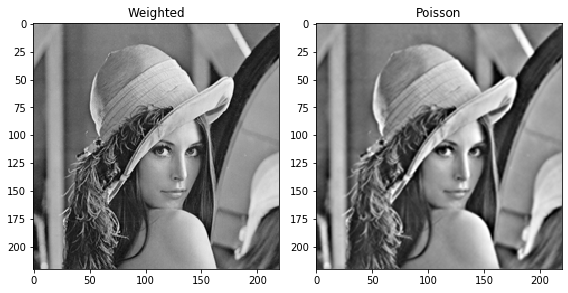

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(weighted_grayscale.data, plt.cm.gray)
axes[0].set_title("Weighted")
axes[1].imshow(gray.data, plt.cm.gray)
axes[1].set_title("Poisson")
fig.tight_layout()

### error handling

In [36]:
gray = grayscale.Grayscale("./files/test_images/lena.png", color=False)

AssertionError: we can only grayscale images that have color

# Anonymizing

In [37]:
from backend import anonymizing
anon = anonymizing.Anonymous("./files/test_images/lena.png", color=False)

## Grayscale 

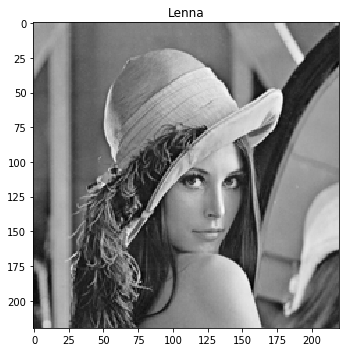

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(anon.data, plt.cm.gray)
axes.set_title("Lenna")
fig.tight_layout()

In [39]:
anon.fit(100)

./files/test_images/lena.png

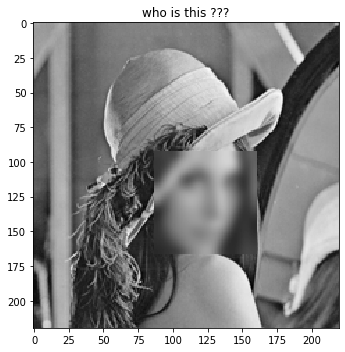

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(anon.data, plt.cm.gray)
axes.set_title("who is this ???")
fig.tight_layout()

## Color

In [41]:
anon = anonymizing.Anonymous("./files/test_images/lena.png", color=True)

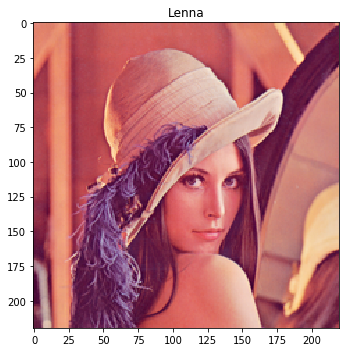

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(anon.data, plt.cm.gray)
axes.set_title("Lenna")
fig.tight_layout()

In [43]:
anon.fit(100)

./files/test_images/lena.png

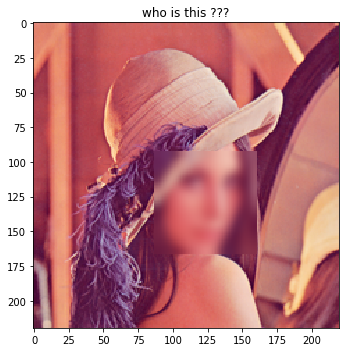

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(anon.data, plt.cm.gray)
axes.set_title("who is this ???")
fig.tight_layout()

# HDR

In [45]:
from engine import hdr_image_handler
from backend import reconstruction_HDR
from backend import inpaiting

## Example

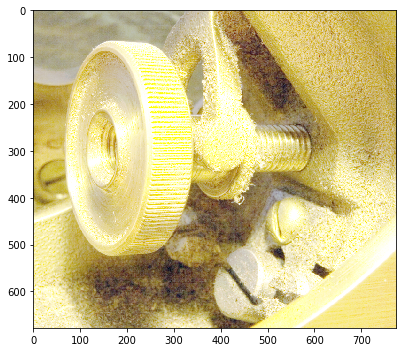

In [46]:
HDR = reconstruction_HDR.ReconstructionHDR()
HDR.fit()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(HDR.data, plt.cm.gray)
fig.tight_layout()

## custom images

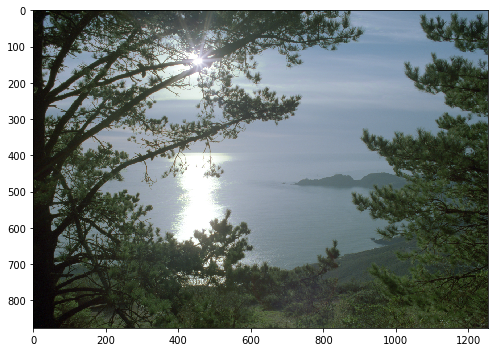

In [47]:
HDR = reconstruction_HDR.ReconstructionHDR([
		image_handler.ImageHandler('../hdr-bilder/Ocean/Ocean_00064.png'),
		image_handler.ImageHandler('../hdr-bilder/Ocean/Ocean_00128.png'),
		image_handler.ImageHandler('../hdr-bilder/Ocean/Ocean_00256.png'),
		image_handler.ImageHandler('../hdr-bilder/Ocean/Ocean_00512.png')
	])
HDR.fit()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
axes.imshow(HDR.data, plt.cm.gray)
fig.tight_layout()

# Edge preserving blur

In [48]:
from backend import non_edge_blurring

## Grayscale

In [49]:
edge_blur_gray = non_edge_blurring.NonEdgeBlur("./files/test_images/lena.png", color=False)
edge_blur_gray.fit(epochs=30)

./files/test_images/lena.png

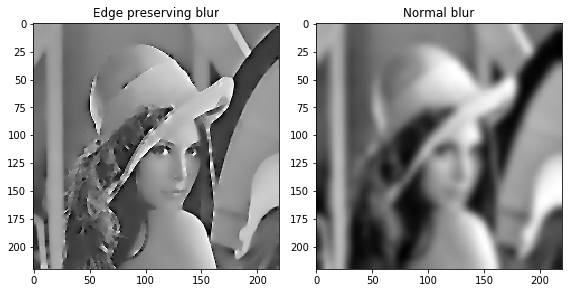

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(edge_blur_gray.data, plt.cm.gray)
axes[0].set_title("Edge preserving blur")

axes[1].imshow(blur_gray.data, plt.cm.gray)
axes[1].set_title("Normal blur")

fig.tight_layout()


## Color

In [51]:
edge_blur = non_edge_blurring.NonEdgeBlur("./files/test_images/lena.png", color=True)
edge_blur.fit(epochs=30)

./files/test_images/lena.png

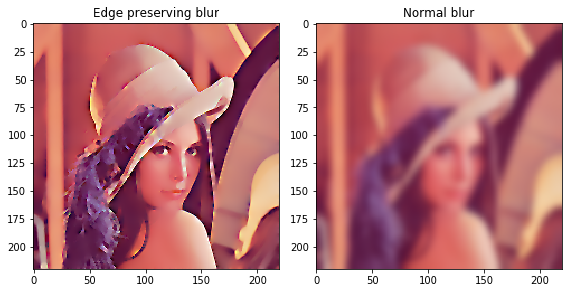

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(edge_blur.data, plt.cm.gray)
axes[0].set_title("Edge preserving blur")

axes[1].imshow(blur_color.data, plt.cm.gray)
axes[1].set_title("Normal blur")

fig.tight_layout()

## K value

In [60]:
edge_blur = non_edge_blurring.NonEdgeBlur("./files/test_images/lena.png", color=True)
edge_blur.k = 100
edge_blur.fit(epochs=10)

./files/test_images/lena.png

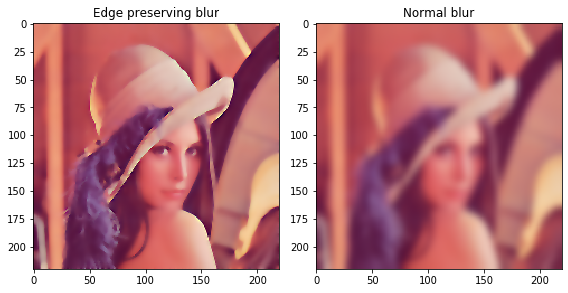

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axes[0].imshow(edge_blur.data, plt.cm.gray)
axes[0].set_title("Edge preserving blur")

axes[1].imshow(blur_color.data, plt.cm.gray)
axes[1].set_title("Normal blur")

fig.tight_layout()

### error checking

In [62]:
edge_blur.k = "error"

AssertionError: k should be a number